In [2]:
!python --version

Python 3.10.12


In [3]:
import sys
sys.version

'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [4]:
!pip show pip

Name: pip
Version: 24.1.2
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: 
Author-email: The pip developers <distutils-sig@python.org>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: fastai


In [5]:
import sys

if sys.version_info.major >= 3 and sys.version_info.minor >=10 and sys.version_info.micro >=0:
  print("correct python version")
else:
  print("please use python version 3.10.11 for kaggle and above colab")

correct python version


## importing book

In [6]:
  import numpy as np
  import pandas as pd
  import matplotlib
  import matplotlib.pyplot as plt

In [7]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.26.4
2.2.3
3.7.5


In [8]:
pip show requests

Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, datashader, diffusers, docker, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, google-genai, h2o, huggingface-hub, id, jupyterlab_server, kaggle, kaggle-environments, kagglehub, keras-tuner, langchain, langsmith, libpysal, moviepy, music21, nilearn, pandas-datareader, panel, papermill, pooch, pymystem3, ray, requests-oauthlib, requests-toolbelt, sigstore, spacy, Sphinx, tensorflow, tensorflow-datasets, tiktoken, transformers, tsfresh, tuf, tweepy, update-checker, wandb, weasel, ydata-profiling, yfinance
Note: you may need to restart the kernel to use updated packa

In [9]:
def download_book_from_web(url):
    import requests

    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Set encoding

        # Check if the request was successful
        if response.status_code == 200:
            text = response.text  # Store the text in a variable

            # Save to file (optional)
            with open('book.txt', 'w', encoding='utf-8') as f:
                print('Book downloaded successfully!')
                f.write(text)

            return text  # Return the variable for further use
        else:
            print(f"Failed to fetch book text. Status code: {response.status_code}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error downloading book: {e}")
        return None
url = 'https://www.gutenberg.org/files/244/244-0.txt'
text=download_book_from_web(url)

Book downloaded successfully!


In [10]:
text[:1000]

'\ufeffThe Project Gutenberg eBook of A Study In Scarlet, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Study In Scarlet\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: April, 1995 [eBook #244]\r\n[Most recently updated: April 18, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Roger Squires and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I.

In [11]:
text[-1000:-1]

'/donate\r\n\r\nSection 5. General Information About Project Gutenberg™ electronic works\r\n\r\nProfessor Michael S. Hart was the originator of the Project\r\nGutenberg™ concept of a library of electronic works that could be\r\nfreely shared with anyone. For forty years, he produced and\r\ndistributed Project Gutenberg™ eBooks with only a loose network of\r\nvolunteer support.\r\n\r\nProject Gutenberg™ eBooks are often created from several printed\r\neditions, all of which are confirmed as not protected by copyright in\r\nthe U.S. unless a copyright notice is included. Thus, we do not\r\nnecessarily keep eBooks in compliance with any particular paper\r\nedition.\r\n\r\nMost people start at our website which has the main PG search\r\nfacility: www.gutenberg.org\r\n\r\nThis website includes information about Project Gutenberg™,\r\nincluding how to make donations to the Project Gutenberg Literary\r\nArchive Foundation, how to help produce our new eBooks, and how to\r\nsubscribe to our ema

# Extract Title and Author from metadata

In [12]:
# Extract Title and Author from metadata
import re
mo_title = re.search(r"Title: ([^\r\n]+)", text)
mo_author = re.search(r"Author: ([^\r\n]+)", text)

if mo_title and mo_author:
    Title = mo_title.group(1).strip()  # "A Study In Scarlet"
    Author = mo_author.group(1).strip()  # "Arthur Conan Doyle"
    print(f"Title: {Title}")
    print(f"Author: {Author}")
else:
    print("Metadata not found.")

Title: A Study In Scarlet
Author: Arthur Conan Doyle


In [13]:
Title

'A Study In Scarlet'

In [14]:
Author

'Arthur Conan Doyle'

# stripping content

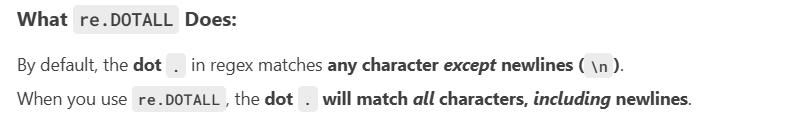

# remove header footer 

In [15]:
import re

def remove_gutenberg_header_footer(text):
    """
    Removes the Project Gutenberg header and footer from the text.
    Returns the cleaned content.
    """
    # Header pattern (already compiled with re.DOTALL)
    header_pattern = re.compile(
        r'^.*?\*\*\* START OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Footer pattern (already compiled with re.DOTALL)
    footer_pattern = re.compile(
        r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*.*$',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Remove header (NO flags needed, pattern is pre-compiled)
    text = header_pattern.sub('', text)
    
    # Remove footer (NO flags needed, pattern is pre-compiled)
    text = footer_pattern.sub('', text)
    
    return text.strip()

In [16]:

header_footer_removed = remove_gutenberg_header_footer(text)
print("header_footer_removed")

header_footer_removed


In [17]:
header_footer_removed[-1000:-1]

' British soil. It is an\r\nopen secret that the credit of this smart capture belongs entirely to\r\nthe well-known Scotland Yard officials, Messrs. Lestrade and Gregson.\r\nThe man was apprehended, it appears, in the rooms of a certain Mr.\r\nSherlock Holmes, who has himself, as an amateur, shown some talent in\r\nthe detective line, and who, with such instructors, may hope in time to\r\nattain to some degree of their skill. It is expected that a testimonial\r\nof some sort will be presented to the two officers as a fitting\r\nrecognition of their services.”\r\n\r\n“Didn’t I tell you so when we started?” cried Sherlock Holmes with a\r\nlaugh. “That’s the result of all our Study in Scarlet: to get them a\r\ntestimonial!”\r\n\r\n“Never mind,” I answered, “I have all the facts in my journal, and the\r\npublic shall know them. In the meantime you must make yourself\r\ncontented by the consciousness of success, like the Roman miser—\r\n\r\n\r\n“‘Populus me sibilat, at mihi plaudo\r\nIpse d

In [18]:
header_footer_removed[:1000]

'A STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I. MR. SHERLOCK HOLMES.\r\n CHAPTER II. THE SCIENCE OF DEDUCTION.\r\n CHAPTER III. THE LAURISTON GARDENS MYSTERY\r\n CHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\r\n CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\r\n CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\r\n CHAPTER VII. LIGHT IN THE DARKNESS.\r\n\r\n PART II. THE COUNTRY OF THE SAINTS\r\n CHAPTER I. ON THE GREAT ALKALI PLAIN.\r\n CHAPTER II. THE FLOWER OF UTAH.\r\n CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\r\n CHAPTER IV. A FLIGHT FOR LIFE.\r\n CHAPTER V. THE AVENGING ANGELS.\r\n CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\r\n CHAPTER VII. THE CONCLUSION.\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET.\r\n\r\n\r\n\r\n\r\nPART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical Department._)\r\n\r\n\r\n\r\n\r\nCHAPTER I.\

In [19]:
import re

def remove_table_of_contents(text):
    """
    Removes the table of contents from the text, keeping only the actual content
    starting from the second occurrence of "PART I."
    
    Args:
        text (str): The full text containing table of contents and main content
        
    Returns:
        str: The text with table of contents removed
    """
    # Split the text at each "PART I." occurrence
    parts = header_footer_removed.split("PART I.")
    
    # If we found at least two occurrences (table of contents + actual content)
    if len(parts) >= 2:
        # Keep everything from the second "PART I." onward
        return "PART I." + parts[2]
    else:
        # If no table of contents found, return original text
        return header_footer_removed

# Example usage:

remove_table_of_contents = remove_table_of_contents(text)
print(remove_table_of_contents[:1000])

PART I.


(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,
_Late of the Army Medical Department._)




CHAPTER I.
MR. SHERLOCK HOLMES.


In the year 1878 I took my degree of Doctor of Medicine of the
University of London, and proceeded to Netley to go through the course
prescribed for surgeons in the army. Having completed my studies there,
I was duly attached to the Fifth Northumberland Fusiliers as Assistant
Surgeon. The regiment was stationed in India at the time, and before I
could join it, the second Afghan war had broken out. On landing at
Bombay, I learned that my corps had advanced through the passes, and
was already deep in the enemy’s country. I followed, however, with many
other officers who were in the same situation as myself, and succeeded
in reaching Candahar in safety, where I found my regiment, and at once
entered upon my new duties.

The campaign brought honours and promotion to many, but for me it had
nothing but misfortune


In [20]:
remove_table_of_contents[:1000]

'PART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical Department._)\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\nIn the year 1878 I took my degree of Doctor of Medicine of the\r\nUniversity of London, and proceeded to Netley to go through the course\r\nprescribed for surgeons in the army. Having completed my studies there,\r\nI was duly attached to the Fifth Northumberland Fusiliers as Assistant\r\nSurgeon. The regiment was stationed in India at the time, and before I\r\ncould join it, the second Afghan war had broken out. On landing at\r\nBombay, I learned that my corps had advanced through the passes, and\r\nwas already deep in the enemy’s country. I followed, however, with many\r\nother officers who were in the same situation as myself, and succeeded\r\nin reaching Candahar in safety, where I found my regiment, and at once\r\nentered upon my new duties.\r\n\r\nThe campaign brought honours and promotion

In [21]:
import re

def remove_table_of_contents(text):
    """
    Removes:
    1. The table of contents (everything before the actual content)
    2. The specific PART I introduction text
    Keeps only the chapter content starting from "CHAPTER I."
    """
    # First remove table of contents by finding the actual content start
    parts = header_footer_removed.split("PART I.")
    if len(parts) >= 2:
        content = "PART I." + parts[2]
    else:
        content = header_footer_removed
    
    # Now remove the specific PART I introduction
    # Split at the first CHAPTER occurrence after PART I
    chapters = re.split(r'CHAPTER [I]+\.', content, maxsplit=1)
    
    if len(chapters) > 1:
        # Keep everything from first chapter onward
        return "CHAPTER I." + chapters[1]
    return content

# Example usage:

remove_table_of_contents = remove_table_of_contents(header_footer_removed)
print(remove_table_of_contents[:100])

CHAPTER I.
MR. SHERLOCK HOLMES.


In the year 1878 I took my degree of Doctor of Medicine of the


In [22]:
remove_table_of_contents[:300]

'CHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\nIn the year 1878 I took my degree of Doctor of Medicine of the\r\nUniversity of London, and proceeded to Netley to go through the course\r\nprescribed for surgeons in the army. Having completed my studies there,\r\nI was duly attached to the Fifth Northumberland Fusil'

In [23]:
import re

def remove_chapter_heading(text):
    """Remove chapter headings in the format:
    'CHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\n...'
    """
    pattern = r"^'?CHAPTER [A-Z]+\.?\r?\n.*\r?\n\r?\n\r?\n"
    return re.sub(pattern, "", text, flags=re.MULTILINE)

# Example usage:
original_text = remove_table_of_contents
cleaned_text = remove_chapter_heading(original_text)
print(cleaned_text[-600:-1])

 of their skill. It is expected that a testimonial
of some sort will be presented to the two officers as a fitting
recognition of their services.”

“Didn’t I tell you so when we started?” cried Sherlock Holmes with a
laugh. “That’s the result of all our Study in Scarlet: to get them a
testimonial!”

“Never mind,” I answered, “I have all the facts in my journal, and the
public shall know them. In the meantime you must make yourself
contented by the consciousness of success, like the Roman miser—


“‘Populus me sibilat, at mihi plaudo
Ipse domi simul ac nummos contemplor in arca.’


In [24]:
data=cleaned_text
while "\n\n\n" in data:
    data = data.replace("\n\n\n", "\n\n")
data = data.replace("\'", "'")
paragraphs = data.split("\n\n")
final_ps = []
for p in paragraphs:
    p = p.replace("\n-", "").replace("\n", " ")
    final_ps.append(p)
final_data = "\n\n".join(final_ps)
clean_text_for_booknlp=final_data

In [25]:

clean_text_for_booknlp[:1000]

'In the year 1878 I took my degree of Doctor of Medicine of the\r University of London, and proceeded to Netley to go through the course\r prescribed for surgeons in the army. Having completed my studies there,\r I was duly attached to the Fifth Northumberland Fusiliers as Assistant\r Surgeon. The regiment was stationed in India at the time, and before I\r could join it, the second Afghan war had broken out. On landing at\r Bombay, I learned that my corps had advanced through the passes, and\r was already deep in the enemy’s country. I followed, however, with many\r other officers who were in the same situation as myself, and succeeded\r in reaching Candahar in safety, where I found my regiment, and at once\r entered upon my new duties.\r \r The campaign brought honours and promotion to many, but for me it had\r nothing but misfortune and disaster. I was removed from my brigade and\r attached to the Berkshires, with whom I served at the fatal battle of\r Maiwand. There I was struck on 

In [26]:
clean_text_for_booknlp[-1000:-1]

' British soil. It is an\r open secret that the credit of this smart capture belongs entirely to\r the well-known Scotland Yard officials, Messrs. Lestrade and Gregson.\r The man was apprehended, it appears, in the rooms of a certain Mr.\r Sherlock Holmes, who has himself, as an amateur, shown some talent in\r the detective line, and who, with such instructors, may hope in time to\r attain to some degree of their skill. It is expected that a testimonial\r of some sort will be presented to the two officers as a fitting\r recognition of their services.”\r \r “Didn’t I tell you so when we started?” cried Sherlock Holmes with a\r laugh. “That’s the result of all our Study in Scarlet: to get them a\r testimonial!”\r \r “Never mind,” I answered, “I have all the facts in my journal, and the\r public shall know them. In the meantime you must make yourself\r contented by the consciousness of success, like the Roman miser—\r \r \r “‘Populus me sibilat, at mihi plaudo\r Ipse domi simul ac nummos 

In [27]:
with open('/kaggle/working/clean_text_for_booknlp.txt',mode="w",encoding="utf-8")as f:
    f.write(clean_text_for_booknlp)

In [28]:
# Save cleaned text
with open('/kaggle/working/clean_text_for_booknlp.txt', "r", encoding="utf-8") as f:
    text=f.read()

## stopwords removal

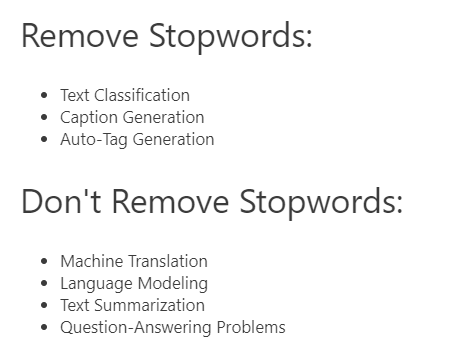

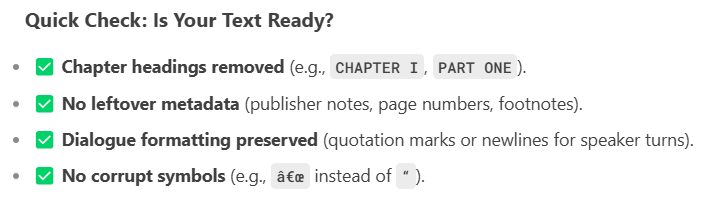

## lowering the text

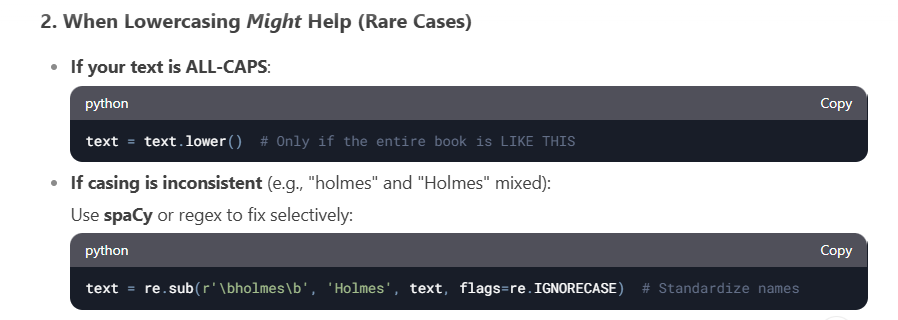

## wordcloud

In [29]:
!pip install wordcloud

In [30]:
pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: ydata-profiling
Note: you may need to restart the kernel to use updated packages.


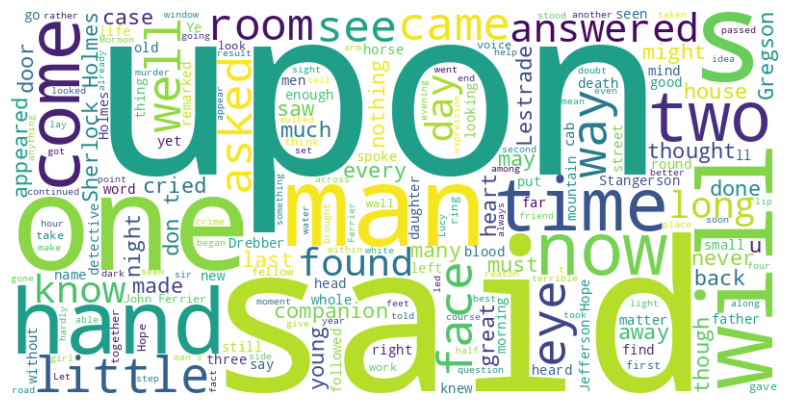

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_for_booknlp)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# performing booknlp

## nlp pipline used to process long txt like books

In [32]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                           
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]                 
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]    
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,683 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/u

In [33]:
!javac -version

javac 11.0.26


In [34]:
!pwd

/kaggle/working


In [35]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all things that all listed in setup.py
#dowload all requriments in editable files and . represent present working directory
!pip install -e .


Cloning into 'booknlp'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 75 (delta 12), reused 6 (delta 6), pack-reused 50 (from 1)
Receiving objects: 100% (75/75), 7.60 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/kaggle/working/booknlp
Obtaining file:///kaggle/working/booknlp
  Preparing metadata (setup.py) ... done
  Running setup.py develop for booknlp


In [36]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"

In [37]:
!pip show booknlp

Name: booknlp
Version: 1.0.7
Summary: 
Home-page: https://github.com/dbamman/book-nlp
Author: David Bamman
Author-email: dbamman@berkeley.edu
License: MIT
Location: /kaggle/working/booknlp
Editable project location: /kaggle/working/booknlp
Requires: spacy, tensorflow, torch, transformers
Required-by: 


In [38]:
!pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: booknlp, en-core-web-sm, fastai


In [39]:
!pwd

/kaggle/working/booknlp


In [40]:
import booknlp
print(booknlp.__file__)  # This gives the package location

/kaggle/working/booknlp/booknlp/__init__.py


## code error fixing for booknlp library

In [41]:
import os
os.chdir("/kaggle/working/")

!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/files_update_for_booknlp_library.zip

--2025-04-06 17:08:32--  https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/files_update_for_booknlp_library.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/files_update_for_booknlp_library.zip [following]
--2025-04-06 17:08:32--  https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/files_update_for_booknlp_library.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8383 (8.2K) [application/zip]
Saving to: ‘files_update_for_booknlp_library.zip’

files_update_for_bo 1

In [42]:
#verify file
!file files_update_for_booknlp_library.zip

files_update_for_booknlp_library.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [43]:
#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/kaggle/working/files_update_for_booknlp_library.zip")
zip_ref.extractall()
zip_ref.close()


In [44]:
import os


for root, dirs, files in os.walk("/kaggle/working/files_update_for_booknlp_library/"):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))


/kaggle/working/files_update_for_booknlp_library/entity_tagger.py
/kaggle/working/files_update_for_booknlp_library/bert_qa.py
/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset
/kaggle/working/files_update_for_booknlp_library/booknlp.py
/kaggle/working/files_update_for_booknlp_library/litbank_coref.py


In [45]:
import pathlib# p is small

data_dir=pathlib.Path("/kaggle/working/files_update_for_booknlp_library/")

file_names=[class_names.name for class_names in data_dir.glob('*')]
file_names

['entity_tagger.py',
 'bert_qa.py',
 'entity_cat.tagset',
 'booknlp.py',
 'litbank_coref.py']

In [46]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/litbank_coref.py",
    "/kaggle/working/files_update_for_booknlp_library/bert_qa.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_tagger.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset",
    
]

destination = "/kaggle/working/booknlp/booknlp/english"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /kaggle/working/files_update_for_booknlp_library/litbank_coref.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/bert_qa.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_tagger.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_cat.tagset to /kaggle/working/booknlp/booknlp/english


In [47]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/booknlp.py"
]

destination = "/kaggle/working/booknlp/booknlp/"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /kaggle/working/files_update_for_booknlp_library/booknlp.py to /kaggle/working/booknlp/booknlp/


In [48]:
!pwd

/kaggle/working


In [49]:
!ls /kaggle/working

booknlp			    files_update_for_booknlp_library
book.txt		    files_update_for_booknlp_library.zip
clean_text_for_booknlp.txt


## If characters isn’t tagged as a character, we may need to tweak the NER model.

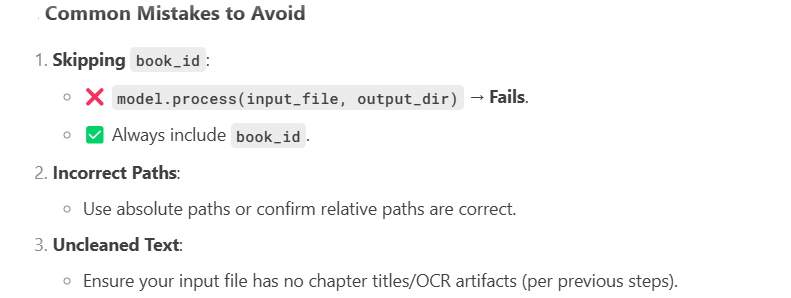

## running full pipeline 🤗

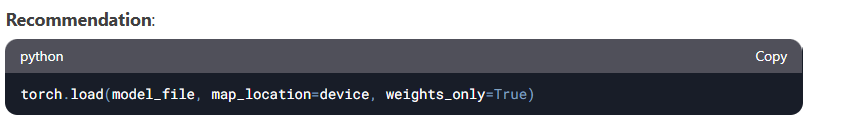

In [50]:
# importing booknlp class
from booknlp.booknlp import BookNLP

using device cuda


In [51]:
book_id_value="a_study_in_scarlet"

In [52]:
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
        "book_id" : book_id_value
	}


In [53]:
!pwd

/kaggle/working


In [54]:
booknlp=BookNLP("en",model_params)

{'pipeline': 'entity,quote,supersense,event,coref', 'model': 'big', 'book_id': 'a_study_in_scarlet'}
downloading entities_google_bert_uncased_L-6_H-768_A-12-v1.0.model
downloading coref_google_bert_uncased_L-12_H-768_A-12-v1.0.model
downloading speaker_google_bert_uncased_L-12_H-768_A-12-v1.0.1.model


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/270M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

--- startup: 45.932 seconds ---


In [55]:
# Input and output paths
input_file = "/kaggle/working/clean_text_for_booknlp.txt"  # Adjust the path if your file is in a different directory
output_dir = "/kaggle/working/booknlp_output"  # Output will be saved in the working directory
book_id = book_id_value  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")

Input file: /kaggle/working/clean_text_for_booknlp.txt
Output directory: /kaggle/working/booknlp_output
Book ID: a_study_in_scarlet


# this will take long time approx 8-10 min

In [56]:
%%time
# Process the book
booknlp.process(input_file, output_dir,book_id)

--- spacy: 6.122 seconds ---
--- entities: 41.737 seconds ---
--- quotes: 0.088 seconds ---
--- attribution: 14.576 seconds ---
--- name coref: 0.113 seconds ---
--- coref: 16.514 seconds ---
--- TOTAL (excl. startup): 79.368 seconds ---, 51973 words
CPU times: user 1min 17s, sys: 2.47 s, total: 1min 19s
Wall time: 1min 19s


In [57]:
# List output files
import os
print(os.listdir(output_dir))

['a_study_in_scarlet.book', 'a_study_in_scarlet.entities', 'a_study_in_scarlet.supersense', 'a_study_in_scarlet.book.html', 'a_study_in_scarlet.tokens', 'a_study_in_scarlet.quotes']


## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)

## **creating dataframe**

In [58]:

tokens = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.tokens', delimiter="\t", encoding='utf-8',quoting=3)
tokens.tail()

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
51968,0,2418,34,51968,in,in,242605,242607,ADP,IN,prep,51967,O
51969,0,2418,35,51969,arca,arca,242608,242612,PROPN,NNP,pobj,51968,O
51970,0,2418,36,51970,.,.,242612,242613,PUNCT,.,punct,51939,O
51971,0,2418,37,51971,’,',242613,242614,PUNCT,'',punct,51939,O
51972,0,2418,38,51972,”,"""",242614,242615,PUNCT,'',punct,51939,O


In [59]:
entities = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.entities", delimiter="\t")
entities

,COREF,start_token,end_token,prop,cat,text
0,0,4,4,PRON,PER,I
1,0,6,6,PRON,PER,my
2,1,13,16,PROP,FAC,the University of London
3,2,16,16,PROP,GPE,London
4,3,21,21,PROP,GPE,Netley
...,...,...,...,...,...,...
7512,1046,51928,51929,NOM,PER,the public
7513,1064,51937,51937,PRON,PER,you
7514,1064,51940,51940,PRON,PER,yourself
7515,1065,51949,51951,NOM,PER,the Roman miser


In [60]:
import warnings
warnings.filterwarnings('ignore')

quotes = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.quotes", delimiter="\t")
quotes

,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,391,394,364.0,366.0,a medical board,220.0,"“ Orontes , ”"
1,735,746,747.0,747.0,he,104.0,"“ Whatever have you been doing with yourself ,..."
2,762,777,778.0,778.0,I,0.0,“ You are as thin as a lath and as brown as a ...
3,802,806,807.0,807.0,he,104.0,“ Poor devil ! ”
4,820,828,807.0,807.0,he,104.0,“ What are you up to now ? ”
...,...,...,...,...,...,...,...
843,51870,51871,51874.0,51874.0,I,0.0,” “
844,51882,51890,51874.0,51874.0,I,0.0,” cried Sherlock Holmes with a laugh . “
845,51908,51909,51874.0,51874.0,I,0.0,” “
846,51913,51917,51949.0,51951.0,the Roman miser,1065.0,"” I answered , “"


In [61]:
supersense = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.supersense', delimiter="\t")
supersense

,start_token,end_token,supersense_category,text
0,2,2,noun.time,year
1,5,5,verb.social,took
2,7,7,noun.communication,degree
3,9,11,noun.communication,Doctor of Medicine
4,14,16,noun.group,University of London
...,...,...,...,...
14448,51939,51939,verb.change,make
14449,51944,51944,noun.cognition,consciousness
14450,51946,51946,noun.state,success
14451,51950,51951,noun.person,Roman miser


In [62]:
import sys
import csv
# wide future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

csv.field_size_limit(sys.maxsize)

131072

###  large JSON file that contains information structured around the characters

In [63]:
import json

with open ("/kaggle/working/booknlp_output/a_study_in_scarlet.book", "r") as f:
    book_data = json.load(f)
book_data.keys()

dict_keys(['characters'])

In [64]:
len(book_data["characters"])

464

### expecting some mistakes here to detect wrong things as characters

### For each character, we have a dictionary with 8 keys

In [65]:
book_data["characters"][0].keys()

dict_keys(['agent', 'patient', 'mod', 'poss', 'id', 'g', 'count', 'mentions'])

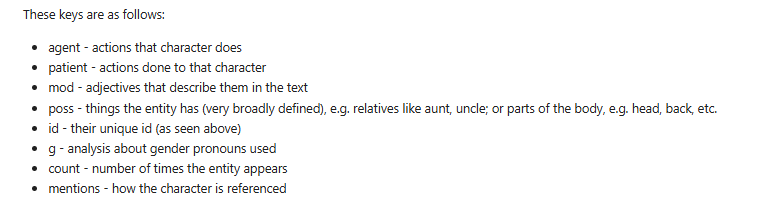

In [66]:
import json
from collections import Counter

def proc(filename):
    with open(filename) as file:
        data=json.load(file)
    return data

def get_counter_from_dependency_list(dep_list):
    counter=Counter()
    for token in dep_list:
        term=token["w"]
        tokenGlobalIndex=token["i"]
        counter[term]+=1
    return counter


def create_character_data(data, printTop):
    character_data = {}
    for character in data["characters"]:

        agentList=character["agent"]
        patientList=character["patient"]
        possList=character["poss"]
        modList=character["mod"]

        character_id=character["id"]
        count=character["count"]

        referential_gender_distribution=referential_gender_prediction="unknown"

        if character["g"] is not None and character["g"] != "unknown":
            referential_gender_distribution=character["g"]["inference"]
            referential_gender=character["g"]["argmax"]

        mentions=character["mentions"]
        proper_mentions=mentions["proper"]
        max_proper_mention=""
        
        #Let's create some empty lists that we can append to.
        poss_items = []
        agent_items = []
        patient_items = []
        mod_items = []
    
        # just print out information about named characters
        if len(mentions["proper"]) > 0:
            max_proper_mention=mentions["proper"][0]["n"]
            for k, v in get_counter_from_dependency_list(possList).most_common(printTop):
                poss_items.append((v,k))
                
            for k, v in get_counter_from_dependency_list(agentList).most_common(printTop):
                agent_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(patientList).most_common(printTop):
                patient_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(modList).most_common(printTop):
                mod_items.append((v,k))  

            
            
            
            # print(character_id, count, max_proper_mention, referential_gender)
            character_data[character_id] = {"id": character_id,
                                  "count": count,
                                  "max_proper_mention": max_proper_mention,
                                  "referential_gender": referential_gender,
                                  "possList": poss_items,
                                  "agentList": agent_items,
                                  "patientList": patient_items,
                                  "modList": mod_items
                                 }
                                
    return character_data


def find_verb_usage(character_data, analysis=["agent", "patient"]):
    new_analysis = []
    for item in analysis:
        if item == "agent":
            new_analysis.append("agentList")
        elif item == "patient":
            new_analysis.append("patientList")
    main_agents = {}
    main_patients = {}
    for character in character_data:
        temp_data = character_data[character]
        for item in new_analysis:
            for verb in temp_data[item]:
                verb = verb[1].lower()
                if item == "agentList":
                    if verb not in main_agents:
                        main_agents[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_agents[verb].append((character, temp_data["max_proper_mention"]))
                elif item == "patientList":
                    if verb not in main_patients:
                        main_patients[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_patients[verb].append((character, temp_data["max_proper_mention"]))
    verb_usage = {"agent": main_agents,
                 "patient": main_patients}
    return verb_usage


### custom functions to generate character data

**Analyze the character data at the verb-level**

**load up our JSON data from the .book file.**

**We can do this with the function above that we created called "proc".**

**the function --------------------> create_character_data**

**This function expects two arguments:**

**the data that we created above, i.e. the original .book JSON data**

**print Top which will be the number of items you seek to return about the** 

**character**

In [67]:
data=proc("/kaggle/working/booknlp_output/a_study_in_scarlet.book")
character_data = create_character_data(data, 20)

In [68]:
for cid, character in list(character_data.items())[:10]:
    print(f"{cid} - {character['max_proper_mention']}")

107 - Holmes
184 - Jefferson Hope
173 - John Ferrier
121 - Drebber
128 - Gregson
117 - Lestrade
174 - Lucy
126 - Stangerson
104 - Stamford
130 - Rance


In [69]:
verb_data = find_verb_usage(character_data)

In [70]:
print(list(verb_data["agent"].keys())[:40],end="\n\n")

print(list(verb_data["patient"].keys())[:40], )

['said', 'have', 'remarked', 'cried', 'answered', 'asked', 'continued', 'think', 'observed', 'took', 'set', 'had', 'read', 'know', 'mean', 'saw', 'appeared', 'sprang', 'went', 'taken', 'came', 'returned', 'departed', 'knew', 'made', 'hurried', 'felt', 'comes', 'led', 'heard', 'realized', 'wandered', 'found', 'followed', 'left', 'remained', '’s', 'played', 'turned', 'sitting']

['remarked', 'asked', 'know', 'ask', 'take', 'arresting', 'set', 'seizes', 'meet', 'meeting', 'saw', 'seize', 'suspected', 'possessed', 'complimenting', 'comparing', 'followed', 'puzzles', 'killed', 'think', 'perceived', 'awaiting', 'given', 'contented', 'faced', 'found', 'brought', 'save', 'persuaded', 'last', 'flung', 'throwing', 'wearing', 'overtake', 'told', 'taken', 'liberated', 'induce', 'distinguished', 'provided']


In [71]:
verb_data["agent"]["said"]

[(107, 'Holmes'),
 (184, 'Jefferson Hope'),
 (173, 'John Ferrier'),
 (121, 'Drebber'),
 (128, 'Gregson'),
 (117, 'Lestrade'),
 (126, 'Stangerson'),
 (104, 'Stamford'),
 (130, 'Rance'),
 (172, 'Stangerson'),
 (154, 'Arthur'),
 (159, 'Mrs. Charpentier'),
 (162, 'The Boots'),
 (177, 'Young')]

In [72]:
verb_data["patient"]["remarked"]

[(107, 'Holmes'), (117, 'Lestrade')]

### **Grabbing the Events**

In [73]:
events = tokens[~tokens['event'].isnull()]
events.head()

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,In,in,0,2,ADP,IN,prep,5,O
1,0,0,1,1,the,the,3,6,DET,DT,det,2,O
2,0,0,2,2,year,year,7,11,NOUN,NN,pobj,0,O
3,0,0,3,3,1878,1878,12,16,NUM,CD,nummod,2,O
4,0,0,4,4,I,I,17,18,PRON,PRP,nsubj,5,O


In [74]:
real_events = events.loc[events["event"] == "EVENT"]
real_events.head()

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
5,0,0,5,5,took,take,19,23,VERB,VBD,ROOT,5,EVENT
37,0,1,3,37,studies,study,193,200,NOUN,NNS,dobj,35,EVENT
43,0,1,9,43,attached,attach,220,228,VERB,VBN,ROOT,43,EVENT
79,0,3,1,79,landing,landing,409,416,NOUN,NN,pobj,78,EVENT
84,0,3,6,84,learned,learn,431,438,VERB,VBD,ROOT,84,EVENT


In [75]:
def get_event_sentences(df):
    real_events = df.loc[df["event"] == "EVENT"]
    sentences = real_events.sentence_ID.tolist()
    event_words = real_events.word.tolist()
    event_lemmas = real_events.lemma.tolist()
    final_sentences = []
    for i, sentence in enumerate(sentences):
        result = df[df["sentence_ID"] == int(sentence)]
        words = result.word.tolist()
        resentence = " ".join(str(word) for word in words if pd.notna(word))  # Fix here
        final_sentences.append(
            {
                "event_word": event_words[i],
                "event_lemma": event_lemmas[i],
                "sentence": resentence,
            }
        )
    return pd.DataFrame(final_sentences)

events = get_event_sentences(tokens)
events

,event_word,event_lemma,sentence
0,took,take,In the year 1878 I took my degree of Doctor of...
1,studies,study,"Having completed my studies there , I was duly..."
2,attached,attach,"Having completed my studies there , I was duly..."
3,landing,landing,"On landing at Bombay , I learned that my corps..."
4,learned,learn,"On landing at Bombay , I learned that my corps..."
...,...,...,...
2706,apprehended,apprehend,"The man was apprehended , it appears , in the ..."
2707,tell,tell,It is expected that a testimonial of some sort...
2708,cried,cry,It is expected that a testimonial of some sort...
2709,laugh,laugh,It is expected that a testimonial of some sort...


In [76]:
from pprint import pprint
pprint(list(events["event_word"].unique()), compact=True)

['took', 'studies', 'attached', 'landing', 'learned', 'advanced', 'followed',
 'reaching', 'found', 'entered', 'removed', 'battle', 'struck', 'bullet',
 'shattered', 'grazed', 'threw', 'succeeded', 'bringing', 'rallied', 'improved',
 'fever', 'came', 'convalescent', 'determined', 'dispatched', 'landed',
 'ruined', 'gravitated', 'realized', 'Choosing', 'making', 'conclusion',
 'tapped', 'turning', 'recognized', 'hailed', 'joy', 'asked', 'started',
 'rattled', 'gave', 'said', 'listened', 'misfortunes', 'answered', 'remarked',
 'bemoaning', 'cried', 'looked', 'returned', 'conversation', 'drifted', 'made',
 'leaving', 'particulars', 'proposed', 'added', 'looking', 'laugh', 'saw',
 'spoke', 'turned', 'passed', 'ascended', 'branched', 'flickering', 'bending',
 'sound', 'steps', 'glanced', 'sprang', 'cry', 'pleasure', 'shouted', 'running',
 'discovered', 'introducing', 'gripping', 'perceive', 'astonishment',
 'chuckling', 'seized', 'drew', 'working', 'digging', 'drawing', 'drop', 'add',
 'pre

In [77]:
pprint(events[events["event_word"] == "detected"]["sentence"].values)

array(['Having sniffed the dead man ’s lips I detected a slightly sour smell , and I came to the conclusion that he had had poison forced upon him .'],
      dtype=object)


In [78]:
events.to_csv("/kaggle/working/book.events", index=False)

In [79]:
import pandas as pd
events=pd.read_csv("/kaggle/working/book.events")
events

,event_word,event_lemma,sentence
0,took,take,In the year 1878 I took my degree of Doctor of...
1,studies,study,"Having completed my studies there , I was duly..."
2,attached,attach,"Having completed my studies there , I was duly..."
3,landing,landing,"On landing at Bombay , I learned that my corps..."
4,learned,learn,"On landing at Bombay , I learned that my corps..."
...,...,...,...
2706,apprehended,apprehend,"The man was apprehended , it appears , in the ..."
2707,tell,tell,It is expected that a testimonial of some sort...
2708,cried,cry,It is expected that a testimonial of some sort...
2709,laugh,laugh,It is expected that a testimonial of some sort...


In [80]:
print('\n')
print("Tokens columns:", tokens.columns.tolist())
print('\n')
print("Supersense columns:", supersense.columns.tolist())
print('\n')
print("Quotes columns:", quotes.columns.tolist())
print('\n')
print("Entities columns:", entities.columns.tolist())
print('\n')
print("Events columns:", events.columns.tolist())




Tokens columns: ['paragraph_ID', 'sentence_ID', 'token_ID_within_sentence', 'token_ID_within_document', 'word', 'lemma', 'byte_onset', 'byte_offset', 'POS_tag', 'fine_POS_tag', 'dependency_relation', 'syntactic_head_ID', 'event']


Supersense columns: ['start_token', 'end_token', 'supersense_category', 'text']


Quotes columns: ['quote_start', 'quote_end', 'mention_start', 'mention_end', 'mention_phrase', 'char_id', 'quote']


Entities columns: ['COREF', 'start_token', 'end_token', 'prop', 'cat', 'text']


Events columns: ['event_word', 'event_lemma', 'sentence']


## **Zipping the output directory**

### !zip -r file_name.zip foldername

###   -r standsfor recursive


In [81]:
# Create download link
!zip -r output.zip /kaggle/working --quiet
from IPython.display import FileLink
FileLink('output.zip')

/kaggle/working/output.zip